In [113]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from category_encoders import BinaryEncoder

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [114]:
#df = pd.read_csv("heart_failure_clinical_records_dataset.csv", sep=",")
df = pd.read_csv("data.csv", sep=",")


In [115]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [116]:
df.shape

(569, 33)

In [117]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [118]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Выводим оценочную статистику на экран

In [119]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
#удаляем два неинформативныхстолбца

In [120]:
df = df.drop(['id','Unnamed: 32'], axis = 1)

In [ ]:
#кодирует категориальный признак

In [121]:
res_map={'M':0,
         'B':1}
df['diagnosis']=df['diagnosis'].map(res_map)


In [122]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [123]:
X=df.drop('diagnosis', axis = 1)
y= df['diagnosis']
#делим выборку на две - матрица признаков и прогнозируемая переменная


In [124]:
!pip install category_encoders

In [125]:
object_list_feature = list(X.select_dtypes(include = 'object').columns)

In [126]:
#делим выборку на обучающую и тестовую
SEED=144
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.8, stratify = y, random_state = SEED)

In [127]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_val = X_val.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)

In [128]:
binary_enc = BinaryEncoder(cols = object_list_feature).fit(X_train, y_train)

X_train_binary = binary_enc.transform(X_train.reset_index(drop = True))
X_val_binary = binary_enc.transform(X_val.reset_index(drop = True))

In [129]:
X_train_binary.shape

(113, 30)

In [130]:
X_train_binary.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
1,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,0.06132,...,22.66,30.93,145.30,1603.0,0.1390,0.34630,0.3912,0.17080,0.3007,0.08314
2,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.1732,0.49670,0.5911,0.21630,0.3013,0.10670
3,14.99,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,0.1944,0.05913,...,16.76,31.55,110.20,867.1,0.1077,0.33450,0.3114,0.13080,0.3163,0.09251
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.4000,0.16250,0.2364,0.07678


In [131]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif


In [132]:
from sklearn.feature_selection import VarianceThreshold

In [133]:
#отбираем из пространства признаков наиболее значимые посредством инструмента VarianceThreshold
selector = VarianceThreshold(threshold = 0.01)

In [134]:
X_train_var = selector.fit_transform(X_train_binary)

In [135]:
X_train_var = pd.DataFrame(X_train_var, columns = list(X_train_binary.columns[selector.get_support()]))

In [136]:
X_train_var.shape

(113, 14)

In [137]:

X_train_binary.shape

(113, 30)

In [138]:
X_val_var = selector.transform(X_val_binary)
X_val_var = pd.DataFrame(X_val_var, columns = list(X_val_binary.columns[selector.get_support()]))

,radius_mean,texture_mean,perimeter_mean,area_mean,radius_se,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst
0,20.200,26.83,133.70,1234.0,0.9761,1.8920,7.128,103.600,24.190,33.81,160.00,1671.0,0.3416,0.37030
1,14.870,20.21,96.12,680.9,0.2323,1.6360,1.596,21.840,16.010,28.48,103.90,783.6,0.1388,0.17000
2,14.810,14.70,94.66,680.7,0.2182,0.6232,1.677,20.720,15.610,17.58,101.70,760.2,0.1011,0.11010
3,13.660,19.13,89.46,575.3,0.2244,0.8950,1.804,19.360,15.140,25.50,101.40,708.8,0.3167,0.36600
4,13.510,18.89,88.10,558.1,0.2136,1.3320,1.513,19.290,14.800,27.20,97.33,675.2,0.2570,0.34380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,13.640,15.60,87.38,575.3,0.3242,0.6612,1.996,27.190,14.850,19.05,94.11,683.4,0.1291,0.15330
452,19.690,21.25,130.00,1203.0,0.7456,0.7869,4.585,94.030,23.570,25.53,152.50,1709.0,0.4245,0.45040
453,8.196,16.84,51.71,201.9,0.1563,0.9567,1.094,8.205,8.964,21.96,57.26,242.2,0.1357,0.06880
454,9.904,18.06,64.60,302.4,0.4311,2.2610,3.132,27.480,11.260,24.39,73.07,390.2,0.2950,0.34860


In [45]:
#подбор наилучших параметров для модели случайный лес 
#(функцией GridSearchCV и RandomizedSearchCV) на данных полученных с помощью VarianceThreshold

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
forest_model = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(forest_model, parametrs, cv=5)
grid.fit(X_train_var,y_train)
grid.best_params_

{'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [158]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_forest=grid.predict(X_val_var)
confmat_forest_model = confusion_matrix(y_true=y_val, y_pred=y_pred_forest)
print(confmat_forest_model)

print("Classification Report Random Forest")
print(classification_report(y_val, y_pred_forest))

[[132  38]
 [ 10 276]]
Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       170
           1       0.88      0.97      0.92       286

    accuracy                           0.89       456
   macro avg       0.90      0.87      0.88       456
weighted avg       0.90      0.89      0.89       456



In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
forest_model = RandomForestClassifier(n_estimators=20)
hp = {"max_depth": [4, 3, 2],
              "min_samples_split": sp_randint(2, 11),
              "criterion": ["gini", "entropy"],
              "bootstrap": [True, False]
              }
n_iter_search = 10
random_search = RandomizedSearchCV(forest_model, param_distributions=hp,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X_train_var,y_train)
random_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_split': 5}

In [163]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_forest=random_search.predict(X_val_var)
confmat_forest_model = confusion_matrix(y_true=y_val, y_pred=y_pred_forest)
print(confmat_forest_model)

print("Classification Report Random Forest")
print(classification_report(y_val, y_pred_forest))

[[138  32]
 [ 11 275]]
Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       170
           1       0.90      0.96      0.93       286

    accuracy                           0.91       456
   macro avg       0.91      0.89      0.90       456
weighted avg       0.91      0.91      0.90       456



In [144]:
from sklearn.ensemble import GradientBoostingClassifier

gBoost = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_depth=5, random_state=0)
gBoost.fit(X_train_var, y_train)
y_pred_gBoost = gBoost.predict(X_val_var)

confmat_gBoost_model = confusion_matrix(y_true=y_val, y_pred=y_pred_gBoost)
print(confmat_gBoost_model)

print("Classification Report GBoost")
print(classification_report(y_val, y_pred_gBoost))

[[146  24]
 [ 17 269]]
Classification Report GBoost
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       170
           1       0.92      0.94      0.93       286

    accuracy                           0.91       456
   macro avg       0.91      0.90      0.90       456
weighted avg       0.91      0.91      0.91       456



In [145]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(C=100.0, random_state=0)
logReg.fit(X_train_var, y_train)
y_pred_logReg = logReg.predict(X_val_var)

confmat_logReg_model = confusion_matrix(y_true=y_val, y_pred=y_pred_logReg)
print(confmat_logReg_model)

print("Classification Report Logistic Regession")
print(classification_report(y_val, y_pred_logReg))

[[139  31]
 [ 15 271]]
Classification Report Logistic Regession
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       170
           1       0.90      0.95      0.92       286

    accuracy                           0.90       456
   macro avg       0.90      0.88      0.89       456
weighted avg       0.90      0.90      0.90       456



In [ ]:
#Отбор наиболее важных признаков с помощью Mutual information. 

In [146]:
select_k_best_classifier = SelectKBest(mutual_info_classif, 10)

In [147]:
X_train_mutual_info = select_k_best_classifier.fit_transform(X_train_binary, y_train)

In [148]:
X_train_mutual_info = pd.DataFrame(X_train_mutual_info, columns = 
                                   list(X_train_binary.columns[select_k_best_classifier.get_support()]))

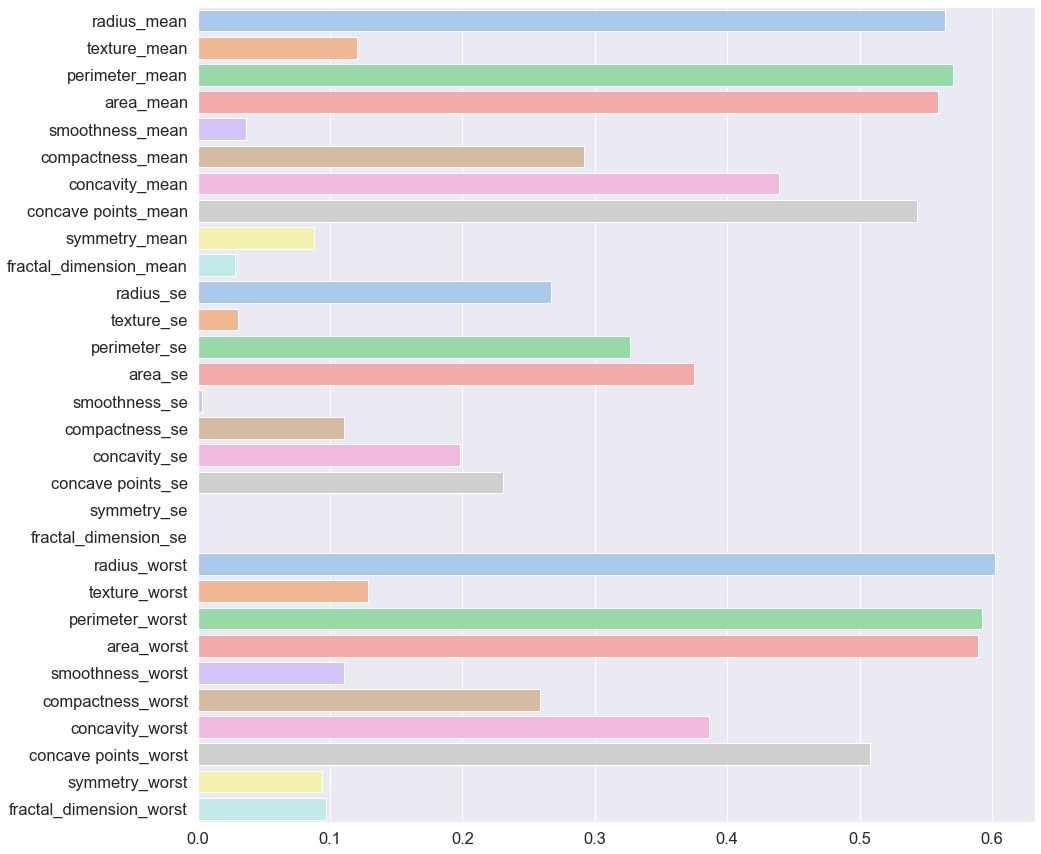

In [149]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 15))
sns.barplot(y = X_train_binary.columns, x = select_k_best_classifier.scores_, palette = 'pastel', orient = 'h');

In [150]:
X_train_mutual_info.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,12.18,77.79,451.1,0.02490,0.02941,12.83,82.14,495.2,0.0498,0.05882
1,18.82,123.70,1110.0,0.15940,0.08744,22.66,145.30,1603.0,0.3912,0.17080
2,15.46,103.80,731.3,0.20300,0.08520,17.11,117.70,909.4,0.5911,0.21630
3,14.99,97.53,693.7,0.06859,0.03876,16.76,110.20,867.1,0.3114,0.13080
4,20.29,135.10,1297.0,0.19800,0.10430,22.54,152.20,1575.0,0.4000,0.16250


In [153]:
X_train_mutual_info.shape

(113, 10)

In [151]:
X_val_mutual_info = select_k_best_classifier.transform(X_val_binary)
X_val_mutual_info = pd.DataFrame(X_val_mutual_info, columns = 
                                 list(X_val_binary.columns[select_k_best_classifier.get_support()]))

In [ ]:
#подбор наилучших параметров для модели случайный лес 
#(функцией GridSearchCV и RandomizedSearchCV) на данных полученных с помощью Mutual information

In [178]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'criterion': ["gini", "entropy"],
             'n_jobs' : [1, -1],
            'bootstrap': [True, False]
            }
forest_model_grid = GridSearchCV(forest_model, parametrs, cv=5)


forest_model_grid.fit(X_train_mutual_info,y_train)
from sklearn.metrics import confusion_matrix, classification_report

y_pred_forest=forest_model_grid.predict(X_val_mutual_info)
confmat_forest_model_grid = confusion_matrix(y_true=y_val, y_pred=y_pred_forest)
print(confmat_forest_model_grid)

print("Classification Report Random Forest")
print(classification_report(y_val, y_pred_forest))

[[136  34]
 [ 11 275]]
Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       170
           1       0.89      0.96      0.92       286

    accuracy                           0.90       456
   macro avg       0.91      0.88      0.89       456
weighted avg       0.90      0.90      0.90       456



In [179]:
forest_model_grid.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 1,
 'n_estimators': 30,
 'n_jobs': 1}

In [180]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [183]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'criterion': ["gini", "entropy"],
             'n_jobs' : [1, -1],
            'bootstrap': [True, False]
            }
forest_model_random = RandomizedSearchCV(forest_model, parametrs, cv=5)


forest_model_random.fit(X_train_mutual_info,y_train)
from sklearn.metrics import confusion_matrix, classification_report

y_pred_forest=forest_model_random.predict(X_val_mutual_info)
confmat_forest_model_random = confusion_matrix(y_true=y_val, y_pred=y_pred_forest)
print(confmat_forest_model_random)

print("Classification Report Random Forest")
print(classification_report(y_val, y_pred_forest))

[[146  24]
 [ 10 276]]
Classification Report Random Forest
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       170
           1       0.92      0.97      0.94       286

    accuracy                           0.93       456
   macro avg       0.93      0.91      0.92       456
weighted avg       0.93      0.93      0.92       456



In [185]:
forest_model_random.best_params_

{'n_jobs': -1,
 'n_estimators': 50,
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': True}

In [ ]:
#подбор наилучших параметров для модели градиентный бустинг
#(функцией GridSearchCV и RandomizedSearchCV) на данных полученных с помощью Mutual information

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

gBoost = GradientBoostingClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'learning_rate': [0, 0.1,0.2,0.3,0.4,0.5,0.6],
             'random_state' : [0, 1]
            }
gBoost_grid = GridSearchCV(gBoost, parametrs, cv=5)
gBoost_grid.fit(X_train_mutual_info, y_train)
y_pred_gBoost = gBoost_grid.predict(X_val_mutual_info)

confmat_gBoost_grid = confusion_matrix(y_true=y_val, y_pred=y_pred_gBoost)
print(confmat_gBoost_grid)

print("Classification Report GBoost")
print(classification_report(y_val, y_pred_gBoost))

[[147  23]
 [ 11 275]]
Classification Report GBoost
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       170
           1       0.92      0.96      0.94       286

    accuracy                           0.93       456
   macro avg       0.93      0.91      0.92       456
weighted avg       0.93      0.93      0.92       456



In [191]:
gBoost_grid.best_params_

{'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 20, 'random_state': 0}

In [196]:
from sklearn.ensemble import GradientBoostingClassifier

gBoost = GradientBoostingClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'learning_rate': [0, 0.1,0.2,0.3,0.4,0.5,0.6],
             'random_state' : [0, 1]
            }
gBoost_random = RandomizedSearchCV(gBoost, parametrs, cv=5)
gBoost_random.fit(X_train_mutual_info, y_train)
y_pred_gBoost = gBoost_random.predict(X_val_mutual_info)

confmat_gBoost_random = confusion_matrix(y_true=y_val, y_pred=y_pred_gBoost)
print(confmat_gBoost_random)

print("Classification Report GBoost")
print(classification_report(y_val, y_pred_gBoost))

[[156  14]
 [ 16 270]]
Classification Report GBoost
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       170
           1       0.95      0.94      0.95       286

    accuracy                           0.93       456
   macro avg       0.93      0.93      0.93       456
weighted avg       0.93      0.93      0.93       456



In [197]:
gBoost_random.best_params_

{'random_state': 1, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1}

In [ ]:
#подбор наилучших параметров для модели логистическая регрессия 
#(функцией GridSearchCV и RandomizedSearchCV) на данных полученных с помощью Mutual information

In [212]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
parametrs = { 'penalty': [ 'l1', 'l2'],
            'C': [1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0],
             'random_state':[None, 1]
             
            }
logReg_grid = GridSearchCV(logReg, parametrs, cv=5)
logReg_grid.fit(X_train_mutual_info, y_train)
y_pred_logReg = logReg_grid.predict(X_val_mutual_info)

confmat_logReg_grid = confusion_matrix(y_true=y_val, y_pred=y_pred_logReg)
print(confmat_logReg_grid)

print("Classification Report Logistic Regession")
print(classification_report(y_val, y_pred_logReg))

[[144  26]
 [ 13 273]]
Classification Report Logistic Regession
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       170
           1       0.91      0.95      0.93       286

    accuracy                           0.91       456
   macro avg       0.92      0.90      0.91       456
weighted avg       0.91      0.91      0.91       456



In [213]:
logReg_grid.best_params_

{'C': 2.0, 'penalty': 'l2', 'random_state': None}

In [218]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
parametrs = { 'penalty': [ 'l1', 'l2'],
            'C': [1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0,100.0],
             'random_state':[None, 1]
             
            }
logReg_random = RandomizedSearchCV(logReg, parametrs, cv=5)
logReg_random.fit(X_train_mutual_info, y_train)
y_pred_logReg = logReg_random.predict(X_val_mutual_info)

confmat_logReg_random = confusion_matrix(y_true=y_val, y_pred=y_pred_logReg)
print(confmat_logReg_random)

print("Classification Report Logistic Regession")
print(classification_report(y_val, y_pred_logReg))

[[144  26]
 [  6 280]]
Classification Report Logistic Regession
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       170
           1       0.92      0.98      0.95       286

    accuracy                           0.93       456
   macro avg       0.94      0.91      0.92       456
weighted avg       0.93      0.93      0.93       456



In [219]:
logReg_random.best_params_

{'random_state': 1, 'penalty': 'l2', 'C': 9.0}